# Simple Linear Regression Model 

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pandas as pd

In [208]:
height = np.random.normal(120,20,1000)
weight = (0.35* height)+np.random.normal(10,5,1000)

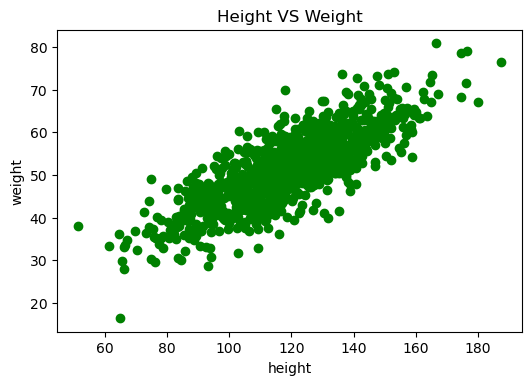

In [209]:
plt.figure(dpi = 100)
plt.scatter(height,weight,color = "green")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Height VS Weight")
plt.show()

In [215]:
class simple_linear_regression:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def predict(self,x,m,c):
        y_hat = m * self.x + c
        return y_hat
    
    def mse(self,y,y_hat):
        error = ((y-y_hat)**2).sum()/len(y)
        return round(error,2)

    def r2_score(self,y_hat):
        rss = ((self.y - y_hat) ** 2).sum()
        tss = ((self.y - y_hat.mean())**2).sum()
        accurecy = 1-(rss/tss)
        return round(accurecy,2)

    
    def regression(self,m,c):
        y_hat = self.predict(self.x,m,c)
        Error = self.mse(self.y, y_hat)
        Accurecy = self.r2_score(y_hat)
        plt.figure(dpi = 100)
        plt.scatter(height,weight,color = "k")
        plt.plot(height,y_hat,"r*",label = f"Accurecy : {Accurecy}\n Error  :  {Error}")
        plt.xlabel("height")
        plt.ylabel("weight")
        plt.legend()
        plt.show()

        
    

In [216]:
s = simple_linear_regression(height,weight)

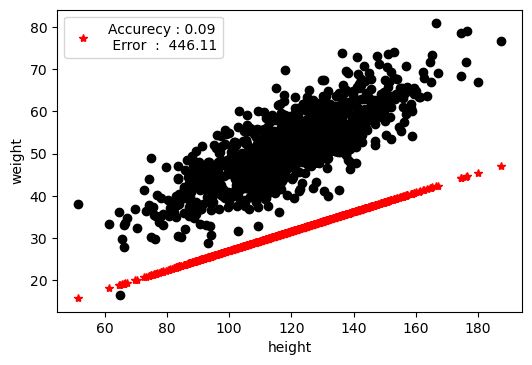

In [217]:
s.regression(0.23,4)

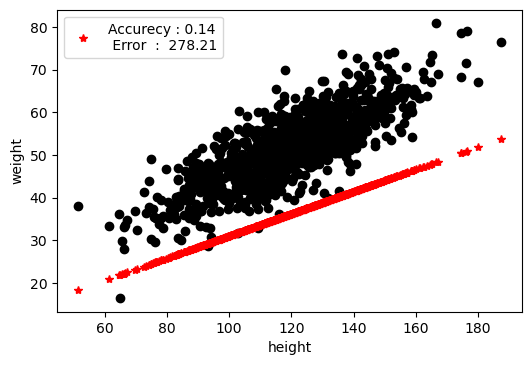

In [218]:
s.regression(0.26,5)

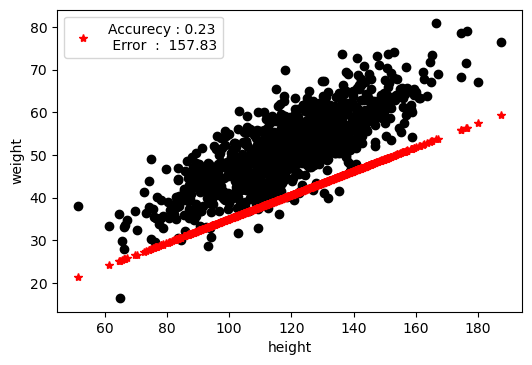

In [219]:
s.regression(0.28,7)

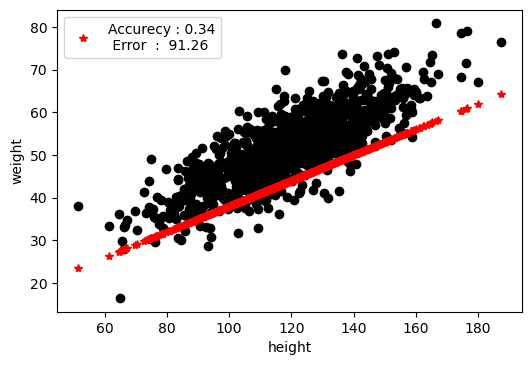

In [220]:
s.regression(0.30,8)

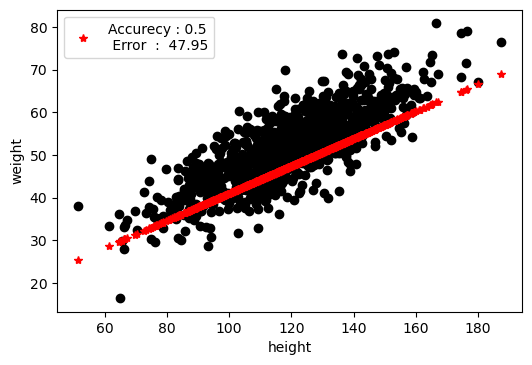

In [221]:
s.regression(0.32,9)

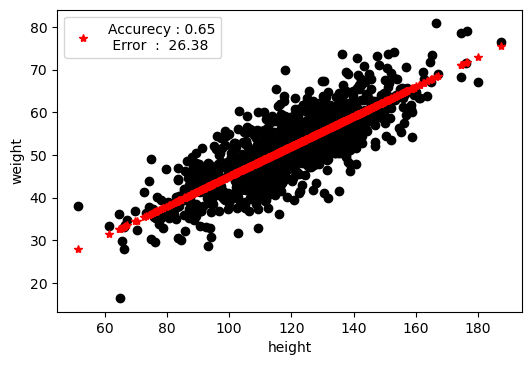

In [222]:
s.regression(0.35,10)

## This is the best fit line of our model You can see
### First We take random value of m and c after we change our value of m and c based on error,accurecy ....end last we found the best value of m and n now we can predict weight based on height

# ****** Now direct method to find best  Fit line  ******

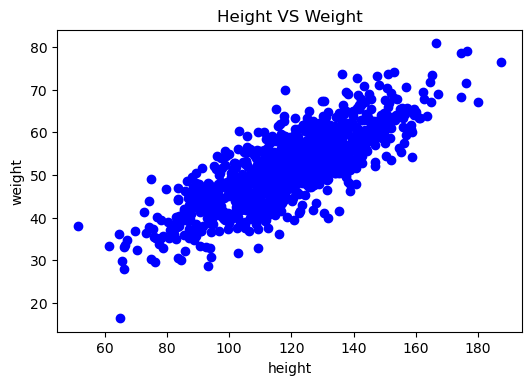

In [223]:
plt.figure(dpi = 100)
plt.scatter(height,weight,color = "blue")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Height VS Weight")
plt.show()

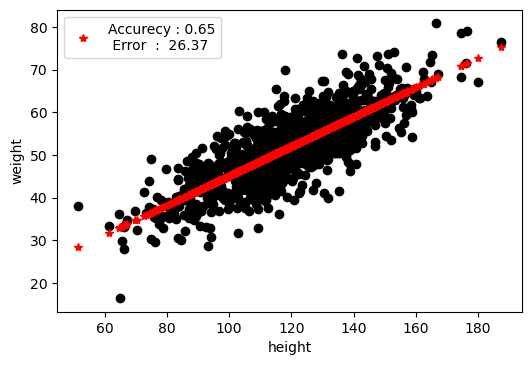

In [226]:
class MyLinearRegression: #normalization method
    def __init__(self,**kwargs):
        self.coef_ = None # m 
        self.intercept_ = None # c
        
    def fit(self,x,y):
        xbar = x.mean()
        ybar = y.mean()
        self.coef_ = ((xbar - x) * (ybar - y)).sum()/((xbar - x)**2).sum()
        self.intercept_ = ybar - self.coef_*xbar
        return self
    
    def predict(self,x):
        return self.intercept_ + self.coef_ * x
            
    
    def mse(self,y,y_hat):
        error = (((y-y_hat)**2).sum())/len(y)
        return round(error,2)

    def r2_score(self,y,y_hat):
        rss = ((y - y_hat) ** 2).sum()
        tss = ((y - y_hat.mean())**2).sum()
        accurecy = 1-(rss/tss)
        return round(accurecy,2)

    
    def regression(self,x,y,y_hat):
        y_hat = self.predict(x)
        Error = self.mse(y, y_hat)
        Accurecy = self.r2_score(y,y_hat)
        plt.figure(dpi = 100)
        plt.scatter(height,weight,color = "k")
        plt.plot(height,y_hat,"r*",label = f"Accurecy : {Accurecy}\n Error  :  {Error}")
        plt.xlabel("height")
        plt.ylabel("weight")
        plt.legend()
        plt.show()

        
my_model = MyLinearRegression()
my_model.fit(height,weight)
y_pred = my_model.predict(height)
my_model.regression(height, weight, y_pred)

### you can see we directly we found best fit line

# Now we will find the best fit line using sklearn.

In [237]:
height = height.reshape(-1,1)
weight = weight.reshape(-1,1)

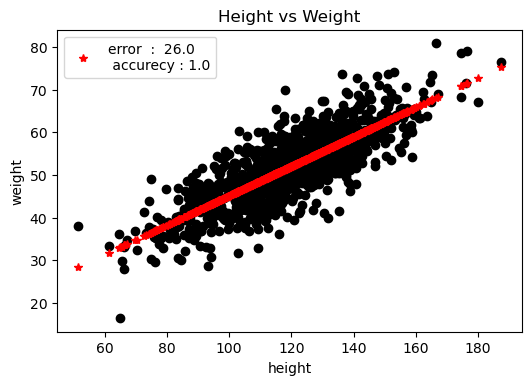

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
plt.figure(dpi = 100)
model = LinearRegression()
model.fit(height,weight)
y_hat = model.predict(height)
mse = round(mean_squared_error(weight,y_hat))
accurecy = round(r2_score(weight,y_hat))
plt.scatter(height,weight,color = "k")
plt.plot(height,y_hat,"r*",label = f"error  :  {mse} \n accurecy : {accurecy}")
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Height vs Weight")
plt.legend()
plt.show()

In [255]:
model.intercept_

array([10.61410647])

In [256]:
model.coef_

array([[0.34517406]])